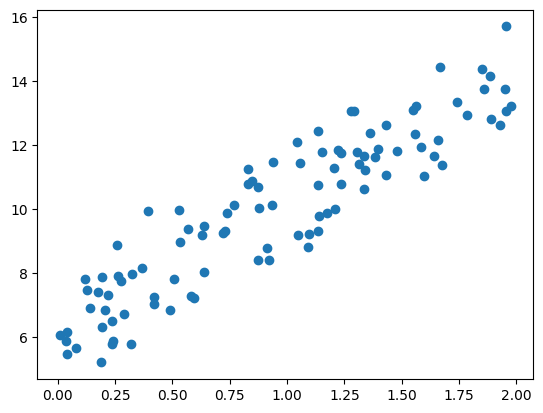

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

In [4]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    y_pred = np.dot(X, w1.T) + w0 
    diff = y - y_pred

    w0_factors = np.ones((N, 1))

    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update
    

In [5]:
w0 = np.zeros((1, 1))
w1 = np.zeros((1, 1))
y_pred = np.dot(X, w1.T) + w0 
diff = y - y_pred 
print(diff.shape)

w0_factors = np.ones((100, 1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [6]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update 
        w0 = w0 - w0_update 

    return w1, w0

In [ ]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred)) / N 
    return cost 

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f"w1: {w1[0, 0]}, w0: {w0[0, 0]}")
y_pred = w1[0, 0] * X + w0
print(get_cost(y, y_pred))

w1: 4.021813642697164, w0: 6.162031224717461
0.9934784315632568


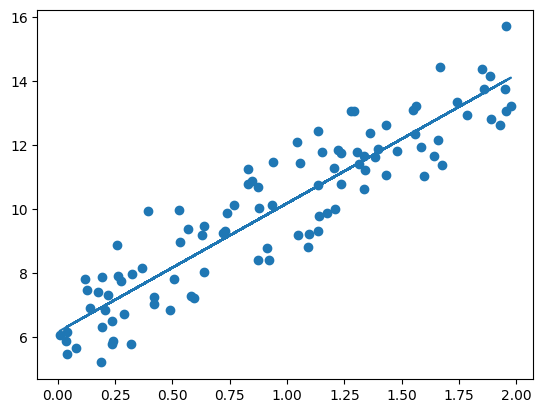

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [11]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0 

    for ind in range(iters): 
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0]) 
        sample_X = X[stochastic_random_index[:batch_size]]
        sample_y = y[stochastic_random_index[:batch_size]]
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update 
        w0 = w0 - w0_update 
            
    return w1, w0

w1: 4.028262908613388, w0: 6.156458908870072
0.9937111256675345


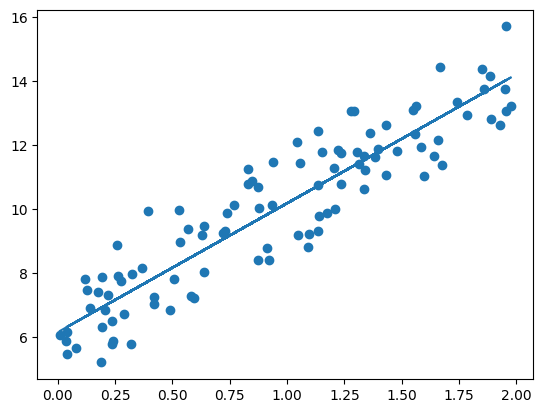

In [12]:
w1, w0 = stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000)
print(f"w1: {w1[0, 0]}, w0: {w0[0, 0]}")
y_pred = w1[0, 0] * X + w0
print(get_cost(y, y_pred))
plt.scatter(X, y)
plt.plot(X, y_pred)


In [14]:
from sklearn.preprocessing import PolynomialFeatures 

X = np.arange(4).reshape(2, 2)
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(poly_ftr)


[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [16]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0] ** 2 + 4*X[:, 1] ** 3
    print(X[:, 0], X[:, 0].shape)
    print(X[:, 1], X[:, 1].shape)
    return y 

X = np.arange(0, 4).reshape(2, 2)

print(X)
y = polynomial_func(X)
print(y)

[[0 1]
 [2 3]]
[0 2] (2,)
[1 3] (2,)
[  5 125]


In [17]:
from sklearn.linear_model import LinearRegression 

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print(poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print(np.round(model.coef_, 2))
print(model.coef_.shape)


[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
(10,)


In [18]:
from sklearn.pipeline import Pipeline 

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y 

model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model.fit(X, y)
print(np.round(model.named_steps['linear'].coef_, 2))


[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [19]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0) 
n_samples = 30 
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1 

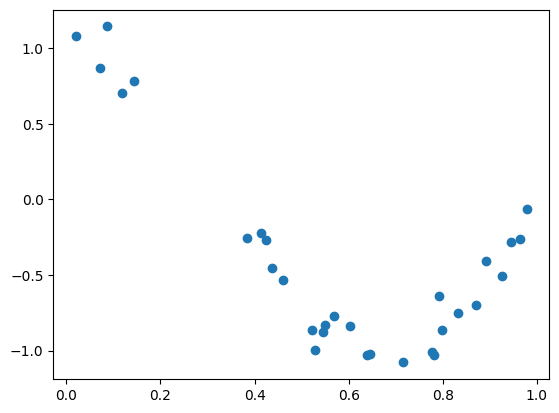

In [20]:
plt.scatter(X, y)

1 [-1.61]
1 -0.4736796287494849
None
4 [  0.47 -17.79  23.59  -7.26]
4 -0.9730544748189202
None
15 [-2.98293000e+03  1.03899360e+05 -1.87416098e+06  2.03716227e+07
 -1.44873316e+08  7.09315656e+08 -2.47065940e+09  6.24561535e+09
 -1.15676620e+10  1.56895110e+10 -1.54006219e+10  1.06457414e+10
 -4.91378296e+09  1.35919876e+09 -1.70381099e+08]
15 -0.9883837147362926
None


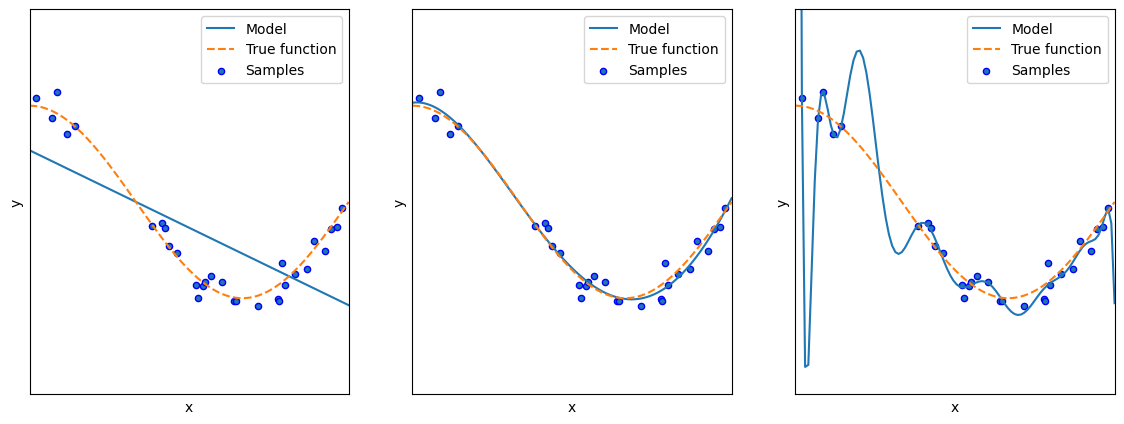

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1) 
    plt.setp(ax, xticks=(), yticks=()) 

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    scores = pipeline.score(X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_ 
    print(degrees[i], np.round(coefficients, 2))
    print(degrees[i], -1*np.mean(scores))

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), '--',  label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    # plt.title(degrees[i], -scores.mean(), scores.std())

plt.show()